In [1]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### Notebook para limpiar datos y generar Features

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
df_train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [4]:
print('Cantidad nulos en Titulo:', df_train.titulo.isnull().sum())

Cantidad nulos en Titulo: 5387


In [5]:
df_test.idzona.value_counts().nsmallest(9000)

114240.0    1
50907.0     1
48691.0     1
65694.0     1
79452.0     1
           ..
23886.0     4
262486.0    4
56911.0     4
59899.0     4
41464.0     4
Name: idzona, Length: 9000, dtype: int64

In [6]:
print('Cantidad nulos en Descripcion:', df_train.descripcion.isnull().sum())

Cantidad nulos en Descripcion: 1619


In [7]:
print('Cantidad nulos en Tipo Propiedad:', df_train.tipodepropiedad.isnull().sum())
df_train.tipodepropiedad.value_counts()

Cantidad nulos en Tipo Propiedad: 46


Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

In [8]:
print('Cantidad nulos en Ciudad:', df_train.ciudad.isnull().sum())
df_train.ciudad.value_counts()

Cantidad nulos en Ciudad: 372


Querétaro               12646
Benito Juárez           11014
Zapopan                 10360
San Luis Potosí          7925
Mérida                   7162
                        ...  
ácatlán                     1
Mulegé                      1
Rafael Lara Grajales        1
Tlalpujahua                 1
Texcaltitlán                1
Name: ciudad, Length: 875, dtype: int64

In [9]:
print('Cantidad nulos en Provincia:', df_train.provincia.isnull().sum())
df_train.provincia.value_counts()

Cantidad nulos en Provincia: 155


Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [10]:
print('Cantidad nulos en Habitaciones:', df_train.habitaciones.isnull().sum())
df_train.habitaciones.value_counts()

Cantidad nulos en Habitaciones: 22471


3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

In [11]:
print('Cantidad nulos en Garages:', df_train.garages.isnull().sum())
df_train.garages.value_counts()

Cantidad nulos en Garages: 37765


2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [12]:
print('Cantidad nulos en Antiguedad:', df_train.antiguedad.isnull().sum())
df_train.antiguedad.value_counts()

Cantidad nulos en Antiguedad: 43555


0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
        ...  
61.0        2
76.0        2
71.0        1
77.0        1
64.0        1
Name: antiguedad, Length: 78, dtype: int64

In [13]:
print('Cantidad nulos en Baños:', df_train.banos.isnull().sum())
df_train.banos.value_counts()

Cantidad nulos en Baños: 26221


2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [14]:
print('Cantidad nulos en Metros Cubiertos:', df_train.metroscubiertos.isnull().sum())
df_train.metroscubiertos.value_counts()

Cantidad nulos en Metros Cubiertos: 17400


200.0    4984
120.0    4290
60.0     4217
90.0     4204
300.0    3920
         ... 
18.0       13
22.0       12
19.0       10
21.0        9
17.0        8
Name: metroscubiertos, Length: 425, dtype: int64

In [15]:
print('Cantidad nulos en Metros Totales:', df_train.metrostotales.isnull().sum())
df_train.metrostotales.value_counts()

Cantidad nulos en Metros Totales: 51467


90.0     7042
200.0    6957
160.0    6026
120.0    5687
300.0    4837
         ... 
18.0       14
21.0       14
17.0       13
23.0       10
19.0        8
Name: metrostotales, Length: 425, dtype: int64

In [16]:
print('Cantidad nulos en Gimnasio:', df_train.gimnasio.isnull().sum())
df_train.gimnasio.value_counts()

Cantidad nulos en Gimnasio: 0


0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [17]:
print('Cantidad nulos en SUM:', df_train.usosmultiples.isnull().sum())
df_train.usosmultiples.value_counts()

Cantidad nulos en SUM: 0


0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [18]:
print('Cantidad nulos en Piscina:', df_train.piscina.isnull().sum())
df_train.piscina.value_counts()

Cantidad nulos en Piscina: 0


0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [19]:
print('Cantidad nulos en Escuelas Cercanas:', df_train.escuelascercanas.isnull().sum())
df_train.escuelascercanas.value_counts()

Cantidad nulos en Escuelas Cercanas: 0


0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [20]:
print('Cantidad nulos en Centros Comerciales Cercanos:', df_train.centroscomercialescercanos.isnull().sum())
df_train.centroscomercialescercanos.value_counts()

Cantidad nulos en Centros Comerciales Cercanos: 0


0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [21]:
print('Cantidad nulos en Fecha:', df_train.fecha.isnull().sum())

Cantidad nulos en Fecha: 0


In [22]:
df_test.isnull().sum()

id                                0
titulo                         1378
descripcion                     401
tipodepropiedad                   7
direccion                     13191
ciudad                           83
provincia                        42
antiguedad                    10714
habitaciones                   5628
garages                        9323
banos                          6554
metroscubiertos                4299
metrostotales                 12655
idzona                         7179
lat                           30695
lng                           30695
fecha                             0
gimnasio                          0
usosmultiples                     0
piscina                           0
escuelascercanas                  0
centroscomercialescercanos        0
dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------

### Reemplazo de Nulos

In [23]:
# Imputamos los NaNs
df_train['metroscubiertos'] = imp_mean.fit_transform(df_train[['metroscubiertos']])
df_test['metroscubiertos'] = imp_mean.transform(df_test[['metroscubiertos']])

In [24]:
# Imputamos los NaNs
df_train['metrostotales'] = imp_mean.fit_transform(df_train[['metrostotales']])
df_test['metrostotales'] = imp_mean.transform(df_test[['metrostotales']])

In [25]:
# Imputamos los NaNs
df_train['banos'] = imp_mean.fit_transform(df_train[['banos']])
df_test['banos'] = imp_mean.transform(df_test[['banos']])

In [26]:
# Imputamos los NaNs
df_train['antiguedad'] = imp_mean.fit_transform(df_train[['antiguedad']])
df_test['antiguedad'] = imp_mean.transform(df_test[['antiguedad']])

In [27]:
# Imputamos los NaNs
df_train['garages'] = imp_mean.fit_transform(df_train[['garages']])
df_test['garages'] = imp_mean.transform(df_test[['garages']])

In [28]:
# Imputamos los NaNs
df_train['habitaciones'] = imp_mean.fit_transform(df_train[['habitaciones']])
df_test['habitaciones'] = imp_mean.transform(df_test[['habitaciones']])

In [29]:
# Imputamos los Nulos
df_train['tipodepropiedad'].fillna("Sin datos", inplace = True)
df_test['tipodepropiedad'].fillna("Sin datos", inplace = True)

In [30]:
# Imputamos los Nulos
df_train['ciudad'].fillna("Sin datos", inplace = True)
df_test['ciudad'].fillna("Sin datos", inplace = True)

In [31]:
# Imputamos los Nulos
df_train['provincia'].fillna("Sin datos", inplace = True)
df_test['provincia'].fillna("Sin datos", inplace = True)

In [32]:
# Imputamos los Nulos
df_train['descripcion'].fillna("Sin datos", inplace = True)
df_test['descripcion'].fillna("Sin datos", inplace = True)

In [33]:
# Imputamos los Nulos
df_train['titulo'].fillna("Sin datos", inplace = True)
df_test['titulo'].fillna("Sin datos", inplace = True)

In [34]:
# Imputamos los Nulos
df_train['direccion'].fillna("Sin datos", inplace = True)
df_test['direccion'].fillna("Sin datos", inplace = True)

In [35]:
# Elimino caracteres que pueden modificar palabras y llevo todas las palabras a minuscular
import string 
char_invalidos = string.punctuation

char_fin_linea = ['\n', '\t', '\r']

def limpiar_cadena (cadena):
    cadena_valida = cadena
    for un_char in char_invalidos:
        cadena_valida = cadena_valida.replace(un_char, " ")
        
    for un_char in char_fin_linea:
        cadena_valida = cadena_valida.replace(un_char, " ")
        
    return cadena_valida.lower()

In [36]:
df_train['descripcion'] = df_train['descripcion'].apply(limpiar_cadena)
df_test['descripcion'] = df_test['descripcion'].apply(limpiar_cadena)

In [37]:
df_train['titulo'] = df_train['titulo'].apply(limpiar_cadena)
df_test['titulo'] = df_test['titulo'].apply(limpiar_cadena)

In [38]:
df_train['direccion'] = df_train['direccion'].apply(limpiar_cadena)
df_test['direccion'] = df_test['direccion'].apply(limpiar_cadena)

-------------------------------------------------------------------------------------------------------------------------------------

### Creación de nuevos Features

In [39]:
def relacion_entre_dos(numerador, denominador):
    if (denominador == 0):
        return 0
    return (numerador / denominador)

##### Cantidad total de Amenities

In [40]:
df_train['cantidad_amenities'] = df_train['gimnasio'] + df_train['usosmultiples'] + df_train['piscina']
df_test['cantidad_amenities'] = df_test['gimnasio'] + df_test['usosmultiples'] + df_test['piscina']

##### Cantidad total de Servicios (escuales/comercios cercanos)

In [41]:
df_train['cantidad_servicios'] = df_train['escuelascercanas'] + df_train['centroscomercialescercanos']
df_test['cantidad_servicios'] =  df_test['escuelascercanas'] + df_test['centroscomercialescercanos']

##### Relación entre Metros Cubiertos sobre Metros Totales

In [42]:
df_train['relacion_metros'] = df_train['metroscubiertos'] / df_train['metrostotales']
df_test['relacion_metros'] = df_test['metroscubiertos'] / df_test['metrostotales']

##### Metros Cuadrados Cubiertos por Habitación

In [43]:
df_train['metros_por_habitacion'] = df_train.metroscubiertos.combine(df_train.habitaciones, func=relacion_entre_dos)
df_test['metros_por_habitacion'] = df_test.metroscubiertos.combine(df_test.habitaciones, func=relacion_entre_dos)

##### Metros cuadrados cubiertos por Baño

In [44]:
df_train['metros_por_bano'] = df_train.metroscubiertos.combine(df_train.banos, func=relacion_entre_dos)
df_test['metros_por_bano'] = df_test.metroscubiertos.combine(df_test.banos, func=relacion_entre_dos)

##### Metros cuadrados por cantidad total de Amenities

In [45]:
df_train['metros_por_amenities'] = df_train.metroscubiertos.combine(df_train.cantidad_amenities, func=relacion_entre_dos)
df_test['metros_por_amenities'] = df_test.metroscubiertos.combine(df_test.cantidad_amenities, func=relacion_entre_dos)

##### Cantidad de Baños por habitación

In [46]:
df_train['bano_por_habitacion'] = df_train.banos.combine(df_train.habitaciones, func=relacion_entre_dos)
df_test['bano_por_habitacion'] = df_test.banos.combine(df_test.habitaciones, func=relacion_entre_dos)

##### Cantidad de Garages por habitación

In [47]:
df_train['garages_por_habitacion'] = df_train.garages.combine(df_train.habitaciones, func=relacion_entre_dos)
df_test['garages_por_habitacion'] = df_test.garages.combine(df_test.habitaciones, func=relacion_entre_dos)

##### Precio promedio según provincia

In [48]:
precio_promedio_por_provincia = df_train.groupby('provincia').agg({'precio':'mean'}).T.to_dict('list')

def obtener_precio_promedio_por_provincia(una_provincia):
    return precio_promedio_por_provincia[una_provincia][0]

#No sirve agregar feature de promedio provincial

##### Precio promedio según la ciudad

In [49]:
precio_promedio_por_ciudad = df_train.groupby('ciudad').agg({'precio':'mean', 'id': 'count',\
                                                             'provincia': lambda x: x.mode()[0]}).T.to_dict('list')
precio_promedio_general = df_train.precio.mean()
precio_promedio_por_ciudad

{'Abalá': [315000.0, 1, 'Yucatán'],
 'Abasolo': [2631016.6666666665, 6, 'Guanajuato'],
 'Abejones': [2500000.0, 1, 'Oaxaca'],
 'Acajete': [3089360.875, 8, 'Puebla'],
 'Acambay': [1575000.0, 8, 'Edo. de México'],
 'Acaponeta': [1103414.0, 1, 'Nayarit'],
 'Acapulco de Juárez': [2585813.164221679, 2454, 'Guerrero'],
 'Acateno': [1100000.0, 1, 'Puebla'],
 'Acatic': [1675000.0, 2, 'Jalisco'],
 'Acatzingo': [3122113.5, 2, 'Puebla'],
 'Acayucan': [394744.0, 2, 'Veracruz'],
 'Acolman': [930767.1232876712, 73, 'Edo. de México'],
 'Aconchi': [389500.0, 2, 'Sonora'],
 'Actopan': [1846754.1666666667, 12, 'Hidalgo'],
 'Acuitzio': [2300000.0, 1, 'Michoacán'],
 'Aculco': [2382000.0, 5, 'Edo. de México'],
 'Acuña': [2477500.0, 4, 'Coahuila'],
 'Agua Dulce': [750000.0, 1, 'Veracruz'],
 'Agua Prieta': [675875.75, 4, 'Sonora'],
 'Aguascalientes': [1545919.3746556474, 1452, 'Aguascalientes'],
 'Ahome': [1165801.3466666667, 150, 'Sinaloa'],
 'Ahuacatlán': [5525000.0, 2, 'Nayarit'],
 'Ahualulco': [2650000.0

In [50]:
#SI LA CIUDAD TIENE MENOS DE 10 VALUES EN EL DF, SE HACE EL PROMEDIO PROVINCIAL
#SI LA CIUDAD NO TIENE PROMEDIO PROVINCIAL, SE HACE PROMEDIO GENERAL

def obtener_provincia(una_ciudad):
    return precio_promedio_por_ciudad[una_ciudad][2]

def obtener_precio_promedio_por_ciudad(una_ciudad):
    if una_ciudad in precio_promedio_por_ciudad:
        if precio_promedio_por_ciudad[una_ciudad][1] > 10:
            return precio_promedio_por_ciudad[una_ciudad][0]
        return precio_promedio_por_provincia[obtener_provincia(una_ciudad)][0]
    return precio_promedio_general

In [51]:
df_train['precio_prom_ciudad'] = df_train['ciudad'].apply(obtener_precio_promedio_por_ciudad)
df_test['precio_prom_ciudad'] = df_test['ciudad'].apply(obtener_precio_promedio_por_ciudad)

##### Precio promedio según tipo de propiedad

In [52]:
precio_promedio_por_propiedad = df_train.groupby('tipodepropiedad').agg({'precio':'mean'}).T.to_dict('list')
precio_promedio_por_propiedad

{'Apartamento': [2763768.662248653],
 'Bodega comercial': [2693757.698435277],
 'Casa': [2398157.709865436],
 'Casa en condominio': [2898927.041819972],
 'Casa uso de suelo': [3732469.22740113],
 'Departamento Compartido': [2560161.8936170214],
 'Duplex': [1271757.973760933],
 'Edificio': [5009499.372492837],
 'Garage': [500000.0],
 'Hospedaje': [3000000.0],
 'Huerta': [3543350.0],
 'Inmuebles productivos urbanos': [3743070.11],
 'Local Comercial': [2365064.1610474633],
 'Local en centro comercial': [2212631.1272727274],
 'Lote': [988760.8],
 'Nave industrial': [3742600.0],
 'Oficina comercial': [3148532.746122918],
 'Otros': [2881688.8582089553],
 'Quinta Vacacional': [3187426.4607594935],
 'Rancho': [4032681.505882353],
 'Sin datos': [2249819.847826087],
 'Terreno': [1805201.8043237808],
 'Terreno comercial': [2472024.5859728507],
 'Terreno industrial': [3647994.4516129033],
 'Villa': [2767351.761764706]}

In [53]:
def obtener_precio_promedio_por_propiedad(un_tipo_propiedad):
    if un_tipo_propiedad in precio_promedio_por_propiedad:
        return precio_promedio_por_propiedad[un_tipo_propiedad][0]
    return precio_promedio_general

In [54]:
df_train['precio_prom_propiedad'] = df_train['tipodepropiedad'].apply(obtener_precio_promedio_por_propiedad)
df_test['precio_prom_propiedad'] = df_test['tipodepropiedad'].apply(obtener_precio_promedio_por_propiedad)

##### Precio según idzona

In [55]:
precio_promedio_por_idzona = df_train.groupby('idzona').agg({'precio':'mean', 'id': 'count',\
                                                             'ciudad': lambda x: x.mode()[0]}).T.to_dict('list')
precio_promedio_por_idzona

{22.0: [3058114.0, 15, 'otra'],
 23.0: [1412615.3846153845, 26, 'Aguascalientes'],
 26.0: [1023140.0, 10, 'Aguascalientes'],
 27.0: [650000.0, 1, 'Aguascalientes'],
 28.0: [1175000.0, 2, 'Aguascalientes'],
 29.0: [2100000.0, 1, 'Aguascalientes'],
 30.0: [1700000.0, 1, 'Aguascalientes'],
 32.0: [1850000.0, 1, 'Aguascalientes'],
 34.0: [580000.0, 1, 'Aguascalientes'],
 35.0: [339250.0, 1, 'Aguascalientes'],
 37.0: [1632500.0, 4, 'Aguascalientes'],
 38.0: [1334500.0, 2, 'Aguascalientes'],
 39.0: [1300000.0, 1, 'Aguascalientes'],
 40.0: [1500000.0, 1, 'Aguascalientes'],
 41.0: [442500.0, 2, 'Aguascalientes'],
 42.0: [883300.0, 10, 'Aguascalientes'],
 43.0: [780000.0, 1, 'Aguascalientes'],
 44.0: [900000.0, 1, 'Aguascalientes'],
 46.0: [1600000.0, 1, 'Aguascalientes'],
 48.0: [1550000.0, 1, 'Aguascalientes'],
 49.0: [802500.0, 2, 'Aguascalientes'],
 51.0: [680000.0, 1, 'Aguascalientes'],
 53.0: [511000.0, 2, 'Aguascalientes'],
 54.0: [1350000.0, 2, 'Aguascalientes'],
 55.0: [1525000.0, 2, '

In [56]:
#SI IDZONA TIENE MENOS DE 4 VALUES EN EL DF, SE HACE EL PROMEDIO DE LA CIUDAD
#SI IDZONA NO ESTA EN EL DICT, SE HACE PROMEDIO GENERAL

def obtener_ciudad(un_idzona):
    return precio_promedio_por_idzona[un_idzona][2]

def obtener_precio_promedio_por_idzona(un_idzona):
    if un_idzona in precio_promedio_por_idzona:
        if precio_promedio_por_idzona[un_idzona][1] >= 2:
            return precio_promedio_por_idzona[un_idzona][0]
        return precio_promedio_por_ciudad[obtener_ciudad(un_idzona)][0]
    return precio_promedio_general

In [57]:
df_train['precio_prom_idzona'] = df_train['idzona'].apply(obtener_precio_promedio_por_idzona)
df_test['precio_prom_idzona'] = df_test['idzona'].apply(obtener_precio_promedio_por_idzona)

##### Pertenece al TOP5 de Provincias más caras

In [58]:
TOP5_provincias_caras = ['Distrito Federal', 'Edo. de México', 'Nuevo León', 'Guerrero', 'Quintana Roo']

def es_provincia_top5 (ciudad):
    if (ciudad in TOP5_provincias_caras):
        return 1
    return 0

In [59]:
df_train['provincia_top5'] = df_train['provincia'].apply(es_provincia_top5)
df_test['provincia_top5'] = df_test['provincia'].apply(es_provincia_top5)

##### Palabras en descripcion y titulo

In [60]:
lst_palabras_seguridad = ['seguridad', 'seguro', 'tranquilidad', 'tranquilo', 'paz']
lst_palabras_moderno = ['modernas', 'modernos', 'moderna', 'moderno', 'modernidad']
lst_palabras_hermoso = ['hermoso', 'hermosa', 'hermosos', 'hermosas', 'lindo', 'linda', 'lindos', 'lindas', 'bello', 'bella', 'bellos', 'bellas']
lst_palabras_estado = ['excelente', 'excelentes', 'residencial', 'confort']

In [61]:
def contar_cantidad_palabras (cadena, lst_palabras_a_buscar):
    cantidad_palabras = 0
    for una_palabra in cadena.split():
        if una_palabra in lst_palabras_a_buscar:
            cantidad_palabras += 1
    return cantidad_palabras

In [62]:
# PALABRAS EN DESCRIPCION
df_train['seguridad_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))
df_test['seguridad_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))

df_train['moderno_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))
df_test['moderno_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))

df_train['hermoso_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))
df_test['hermoso_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))

df_train['estado_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))
df_test['estado_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))

In [63]:
# PALABRAS EN TITULO
df_train['seguridad_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))
df_test['seguridad_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))

df_train['moderno_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))
df_test['moderno_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))

df_train['hermoso_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))
df_test['hermoso_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))

df_train['estado_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))
df_test['estado_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))

In [64]:
def log_palabras (cantidad_palabras, cadena_completa):
    long_cadena = len(cadena_completa.split())
    if (long_cadena == 0):
        return 0
    return np.log((cantidad_palabras / long_cadena) + 1)

In [65]:
df_train['cantidad_palabras_descripcion'] = df_train['seguridad_descripcion'] + df_train['moderno_descripcion'] + \
                                            df_train['hermoso_descripcion'] + df_train['estado_descripcion']

df_test['cantidad_palabras_descripcion'] = df_test['seguridad_descripcion'] + df_test['moderno_descripcion'] + \
                                            df_test['hermoso_descripcion'] + df_test['estado_descripcion']

df_train['relacion_palabras_descripcion'] = df_train.cantidad_palabras_descripcion.combine(df_train.descripcion, func=log_palabras)
df_test['relacion_palabras_descripcion'] = df_test.cantidad_palabras_descripcion.combine(df_test.descripcion, func=log_palabras)

##### Es Avenida

In [66]:
lst_palabras_avenida = ['avenida', 'av', 'Av.', 'av.']

def direccion_es_avenida(direccion):
    for sinonimo_avenida in lst_palabras_avenida:
        if sinonimo_avenida in direccion.split():
            return 1
    return 0

In [67]:
df_train['es_avenida'] = df_train['direccion'].apply(direccion_es_avenida)
df_test['es_avenida'] = df_test['direccion'].apply(direccion_es_avenida)

##### Es Ciudad Capital

In [68]:
dic_estado_capital = {
    'Aguascalientes': 'Aguascalientes',
    'Baja California Norte': 'Mexicali',
    'Baja California Sur': 'La Paz',
    'Campeche': 'Campeche',
    'Chiapas': 'Tuxtla Gutiérrez',
    'Chihuahua': 'Chihuahua',
    'Coahuila': 'Saltillo',
    'Colima': 'Colima',
    'Distrito Federal': 'Ciudad de México',
    'Durango': 'Durango',
    'Edo. de México': 'Toluca',
    'Guanajuato': 'Guanajuato',
    'Guerrero': 'Chilpancingo de los Bravo',
    'Hidalgo': 'Pachuca',
    'Jalisco': 'Guadalajara',
    'Michoacán': 'Morelia',
    'Morelos': 'Cuernavaca', 
    'Nayarit': 'Tepic',
    'Nuevo León': 'Monterrey',
    'Oaxaca': 'Oaxaca de Juárez',
    'Puebla': 'Puebla',
    'Querétaro': 'Querétaro',
    'Quintana Roo': 'Chetumal',
    'San luis Potosí': 'San Luis Potosí',
    'Sinaloa': 'Culiacán',
    'Sonora': 'Hermosillo',
    'Tabasco': 'Villahermosa',
    'Tamaulipas': 'Ciudad Victoria',
    'Tlaxcala': 'Tlaxcala',
    'Veracruz': 'Xalapa',
    'Yucatán': 'Mérida',
    'Zacatecas': 'Zacatecas',
    'Sin datos': ''
}

In [69]:
def ciudad_es_capital_de_provincia(ciudad, provincia):
    if (ciudad == dic_estado_capital[provincia]):
        return 1
    return 0

In [70]:
df_train['es_ciudad_capital'] = df_train.ciudad.combine(df_train.provincia, func=ciudad_es_capital_de_provincia)
df_test['es_ciudad_capital'] = df_test.ciudad.combine(df_test.provincia, func=ciudad_es_capital_de_provincia)

##### TOP15 de Ciudades más turísticas

In [71]:
lst_top15_ciudades_turisticas = [
    'Ciudad de México', 'Rivera Maya', 'Cancún', 'Los Cabos', 'Guadalajara', 'Puerto Vallarta', 'Monterrey', 'Acapulco', 'Nuevo Vallarta',
    'Mazatlán', 'Puebla', 'Querétaro', 'Mérida', 'Veracruz', 'Ixtapa Zihuatanejo'
]

In [72]:
df_train['ciudad_turistica_top15'] = df_train['ciudad'].apply(lambda x: 1 if (x in lst_top15_ciudades_turisticas) else 0)
df_test['ciudad_turistica_top15'] = df_test['ciudad'].apply(lambda x: 1 if (x in lst_top15_ciudades_turisticas) else 0)

##### Mes y Año de publicación

In [73]:
df_train['fecha'] = pd.to_datetime(df_train['fecha'])
df_test['fecha'] = pd.to_datetime(df_test['fecha'])

df_train['anio'] = df_train['fecha'].dt.year
df_test['anio'] = df_test['fecha'].dt.year

df_train['mes'] = df_train['fecha'].dt.month
df_test['mes'] = df_test['fecha'].dt.month

In [74]:
df_train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'cantidad_amenities',
       'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
       'metros_por_bano', 'metros_por_amenities', 'bano_por_habitacion',
       'garages_por_habitacion', 'precio_prom_ciudad', 'precio_prom_propiedad',
       'precio_prom_idzona', 'provincia_top5', 'seguridad_descripcion',
       'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion',
       'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo',
       'cantidad_palabras_descripcion', 'relacion_palabras_descripcion',
       'es_avenida', 'es_ciudad_capital', 'ciudad_turistica_top15', 'anio',
       'mes'],
      dtype='object')

### Eliminamos features repetidos y complejos

In [75]:
drop = ['titulo', 'descripcion', 'direccion', 'fecha']

df_train = df_train.drop(drop, axis=1)
df_test = df_test.drop(drop, axis=1)
df_train.head()

,id,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,...,moderno_titulo,hermoso_titulo,estado_titulo,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes
0,254099,Apartamento,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,2.0,80.0,80.0,...,0,0,0,0,0.000000,1,0,0,2015,8
1,53461,Casa en condominio,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,2.0,268.0,180.0,...,0,0,0,1,0.007968,1,0,0,2013,6
2,247984,Casa,Tonalá,Jalisco,5.000000,3.0,2.0,2.0,144.0,166.0,...,0,0,0,10,0.046957,0,0,0,2015,10
3,209067,Casa,Zinacantepec,Edo. de México,1.000000,2.0,1.0,1.0,63.0,67.0,...,0,0,0,0,0.000000,0,0,0,2012,3
4,185997,Apartamento,Zapopan,Jalisco,10.000000,2.0,1.0,1.0,95.0,95.0,...,0,0,0,1,0.074108,0,0,0,2016,6


### Aplicamos encodings a los features categoricos

In [76]:
import category_encoders as ce

cat_features = ['tipodepropiedad', 'ciudad', 'provincia']

cb_features = ['ciudad']
oh_features = ['tipodepropiedad', 'provincia']

#Elegimos un metodo de encode para estos features, y comentamos el resto de los metodos
#O elegimos distintos metodos dependiendo del feature

#### CatBoostEncoding

In [77]:
catb_enc = ce.CatBoostEncoder(cols=cat_features)
catb_enc.fit(df_train[cat_features], df_train['precio'])

df_train = df_train.join(catb_enc.transform(df_train[cat_features]).add_suffix('_cb'))
df_test = df_test.join(catb_enc.transform(df_test[cat_features]).add_suffix('_cb'))

#### One Hot Encoding

In [78]:
'''one_hot_enc = ce.OneHotEncoder()
one_hot_encoded = one_hot_enc.fit_transform(df_train[oh_features])

df_train = df_train.join(one_hot_encoded.add_suffix("_oh"))
df_test = df_test.join(one_hot_encoded.add_suffix("_oh"))'''

'one_hot_enc = ce.OneHotEncoder()\none_hot_encoded = one_hot_enc.fit_transform(df_train[oh_features])\n\ndf_train = df_train.join(one_hot_encoded.add_suffix("_oh"))\ndf_test = df_test.join(one_hot_encoded.add_suffix("_oh"))'

In [79]:
df_train.shape

(240000, 49)

In [80]:
df_test.shape

(60000, 48)

In [81]:
#Dropeamos los features con strings ya encodeados
#Dejamos los dataset listos para modelar

df_train = df_train.drop(cat_features, axis=1)
df_test = df_test.drop(cat_features, axis=1)

### Feature Selection

In [82]:
from catboost import CatBoostRegressor

feature_cols = df_train.columns.tolist()
feature_cols.remove('precio')

X = df_train[feature_cols]
y = df_train['precio']

CatBoost = CatBoostRegressor(loss_function='MAE')
CatBoost_fit = CatBoost.fit(X, y)

0:	learn: 1487424.0954128	total: 125ms	remaining: 2m 5s
1:	learn: 1458551.3669274	total: 203ms	remaining: 1m 41s
2:	learn: 1430741.8147269	total: 279ms	remaining: 1m 32s
3:	learn: 1403922.0961141	total: 362ms	remaining: 1m 30s
4:	learn: 1378045.9359123	total: 442ms	remaining: 1m 28s
5:	learn: 1352991.7717840	total: 519ms	remaining: 1m 25s
6:	learn: 1328972.5203737	total: 605ms	remaining: 1m 25s
7:	learn: 1305495.5650344	total: 688ms	remaining: 1m 25s
8:	learn: 1284086.5621052	total: 769ms	remaining: 1m 24s
9:	learn: 1262687.2449414	total: 858ms	remaining: 1m 24s
10:	learn: 1242129.7510962	total: 939ms	remaining: 1m 24s
11:	learn: 1222408.7664936	total: 1.02s	remaining: 1m 23s
12:	learn: 1203722.0054349	total: 1.1s	remaining: 1m 23s
13:	learn: 1184895.2968142	total: 1.18s	remaining: 1m 23s
14:	learn: 1167437.9761496	total: 1.26s	remaining: 1m 22s
15:	learn: 1149605.9452794	total: 1.34s	remaining: 1m 22s
16:	learn: 1132240.5103745	total: 1.42s	remaining: 1m 22s
17:	learn: 1117083.1591615

144:	learn: 666437.4835983	total: 11.6s	remaining: 1m 8s
145:	learn: 665808.1397001	total: 11.7s	remaining: 1m 8s
146:	learn: 665088.6667404	total: 11.7s	remaining: 1m 8s
147:	learn: 664522.7760099	total: 11.8s	remaining: 1m 7s
148:	learn: 663538.2545986	total: 11.9s	remaining: 1m 7s
149:	learn: 662983.6539566	total: 12s	remaining: 1m 7s
150:	learn: 662483.2768205	total: 12s	remaining: 1m 7s
151:	learn: 662124.7210091	total: 12.1s	remaining: 1m 7s
152:	learn: 661835.3085902	total: 12.2s	remaining: 1m 7s
153:	learn: 661510.1175794	total: 12.3s	remaining: 1m 7s
154:	learn: 661023.1961483	total: 12.3s	remaining: 1m 7s
155:	learn: 660675.1359744	total: 12.4s	remaining: 1m 7s
156:	learn: 660237.8936488	total: 12.5s	remaining: 1m 7s
157:	learn: 659905.7792739	total: 12.6s	remaining: 1m 7s
158:	learn: 659712.5203920	total: 12.7s	remaining: 1m 6s
159:	learn: 659358.8997276	total: 12.7s	remaining: 1m 6s
160:	learn: 658828.4327280	total: 12.8s	remaining: 1m 6s
161:	learn: 658026.6394042	total: 1

291:	learn: 613792.2978636	total: 23.1s	remaining: 56s
292:	learn: 613574.0776437	total: 23.2s	remaining: 55.9s
293:	learn: 613126.9039608	total: 23.2s	remaining: 55.8s
294:	learn: 612876.8276820	total: 23.3s	remaining: 55.8s
295:	learn: 612716.5796960	total: 23.4s	remaining: 55.7s
296:	learn: 612560.0304136	total: 23.5s	remaining: 55.6s
297:	learn: 612339.8450103	total: 23.6s	remaining: 55.5s
298:	learn: 612159.0939617	total: 23.6s	remaining: 55.4s
299:	learn: 611981.0748919	total: 23.7s	remaining: 55.4s
300:	learn: 611712.2472908	total: 23.8s	remaining: 55.3s
301:	learn: 611567.1657683	total: 23.9s	remaining: 55.2s
302:	learn: 611370.5713551	total: 24s	remaining: 55.1s
303:	learn: 611147.7288317	total: 24s	remaining: 55s
304:	learn: 611043.3760736	total: 24.1s	remaining: 54.9s
305:	learn: 610991.2282584	total: 24.2s	remaining: 54.9s
306:	learn: 610870.9230018	total: 24.3s	remaining: 54.8s
307:	learn: 610636.2919005	total: 24.4s	remaining: 54.7s
308:	learn: 610396.7075286	total: 24.4s

438:	learn: 588372.7191370	total: 34.8s	remaining: 44.4s
439:	learn: 588307.8711793	total: 34.8s	remaining: 44.4s
440:	learn: 588170.4383571	total: 34.9s	remaining: 44.3s
441:	learn: 588119.4689521	total: 35s	remaining: 44.2s
442:	learn: 588015.1833882	total: 35.1s	remaining: 44.1s
443:	learn: 587904.1593818	total: 35.2s	remaining: 44s
444:	learn: 587762.6598165	total: 35.2s	remaining: 44s
445:	learn: 587678.4154922	total: 35.3s	remaining: 43.9s
446:	learn: 587481.9452418	total: 35.4s	remaining: 43.8s
447:	learn: 587410.4347846	total: 35.5s	remaining: 43.7s
448:	learn: 587339.5476205	total: 35.6s	remaining: 43.6s
449:	learn: 587264.5980905	total: 35.6s	remaining: 43.6s
450:	learn: 587112.7210151	total: 35.7s	remaining: 43.5s
451:	learn: 587043.5784776	total: 35.8s	remaining: 43.4s
452:	learn: 586916.2362876	total: 35.9s	remaining: 43.3s
453:	learn: 586750.6543228	total: 36s	remaining: 43.2s
454:	learn: 586651.0450404	total: 36s	remaining: 43.2s
455:	learn: 586626.2467712	total: 36.1s	r

585:	learn: 572059.6311520	total: 46.4s	remaining: 32.8s
586:	learn: 571978.8475005	total: 46.5s	remaining: 32.7s
587:	learn: 571949.2046820	total: 46.5s	remaining: 32.6s
588:	learn: 571867.0189208	total: 46.6s	remaining: 32.5s
589:	learn: 571738.6386933	total: 46.7s	remaining: 32.5s
590:	learn: 571622.3126968	total: 46.8s	remaining: 32.4s
591:	learn: 571534.1079982	total: 46.9s	remaining: 32.3s
592:	learn: 571465.0373749	total: 46.9s	remaining: 32.2s
593:	learn: 571308.5951682	total: 47s	remaining: 32.1s
594:	learn: 571206.8753968	total: 47.1s	remaining: 32.1s
595:	learn: 571173.0213799	total: 47.2s	remaining: 32s
596:	learn: 571073.6488093	total: 47.3s	remaining: 31.9s
597:	learn: 570977.9612009	total: 47.3s	remaining: 31.8s
598:	learn: 570832.8518036	total: 47.4s	remaining: 31.7s
599:	learn: 570688.2987161	total: 47.5s	remaining: 31.7s
600:	learn: 570598.0383948	total: 47.6s	remaining: 31.6s
601:	learn: 570509.1878657	total: 47.7s	remaining: 31.5s
602:	learn: 570391.9036391	total: 4

732:	learn: 560321.8276663	total: 58s	remaining: 21.1s
733:	learn: 560219.0347247	total: 58.1s	remaining: 21.1s
734:	learn: 560153.0379520	total: 58.2s	remaining: 21s
735:	learn: 560106.4524597	total: 58.3s	remaining: 20.9s
736:	learn: 559991.8693061	total: 58.4s	remaining: 20.8s
737:	learn: 559947.0430986	total: 58.4s	remaining: 20.7s
738:	learn: 559806.2679020	total: 58.5s	remaining: 20.7s
739:	learn: 559761.2103207	total: 58.6s	remaining: 20.6s
740:	learn: 559692.2537517	total: 58.7s	remaining: 20.5s
741:	learn: 559573.3204745	total: 58.7s	remaining: 20.4s
742:	learn: 559563.3904050	total: 58.8s	remaining: 20.3s
743:	learn: 559481.8006077	total: 58.9s	remaining: 20.3s
744:	learn: 559464.7221890	total: 59s	remaining: 20.2s
745:	learn: 559436.9065473	total: 59.1s	remaining: 20.1s
746:	learn: 559405.3275450	total: 59.1s	remaining: 20s
747:	learn: 559361.1296138	total: 59.2s	remaining: 19.9s
748:	learn: 559310.2494303	total: 59.3s	remaining: 19.9s
749:	learn: 559252.3995169	total: 59.4s

879:	learn: 552298.2201011	total: 1m 9s	remaining: 9.52s
880:	learn: 552234.7199974	total: 1m 9s	remaining: 9.44s
881:	learn: 552188.7959548	total: 1m 9s	remaining: 9.36s
882:	learn: 552164.4655085	total: 1m 10s	remaining: 9.28s
883:	learn: 552120.2182210	total: 1m 10s	remaining: 9.2s
884:	learn: 552043.5521146	total: 1m 10s	remaining: 9.12s
885:	learn: 552009.4916158	total: 1m 10s	remaining: 9.04s
886:	learn: 551945.7590897	total: 1m 10s	remaining: 8.96s
887:	learn: 551890.8313577	total: 1m 10s	remaining: 8.88s
888:	learn: 551775.6915447	total: 1m 10s	remaining: 8.8s
889:	learn: 551744.5191226	total: 1m 10s	remaining: 8.72s
890:	learn: 551677.6035545	total: 1m 10s	remaining: 8.64s
891:	learn: 551546.8241792	total: 1m 10s	remaining: 8.56s
892:	learn: 551506.0860902	total: 1m 10s	remaining: 8.48s
893:	learn: 551480.4374895	total: 1m 10s	remaining: 8.4s
894:	learn: 551451.4855103	total: 1m 10s	remaining: 8.32s
895:	learn: 551425.4518440	total: 1m 11s	remaining: 8.25s
896:	learn: 551365.7

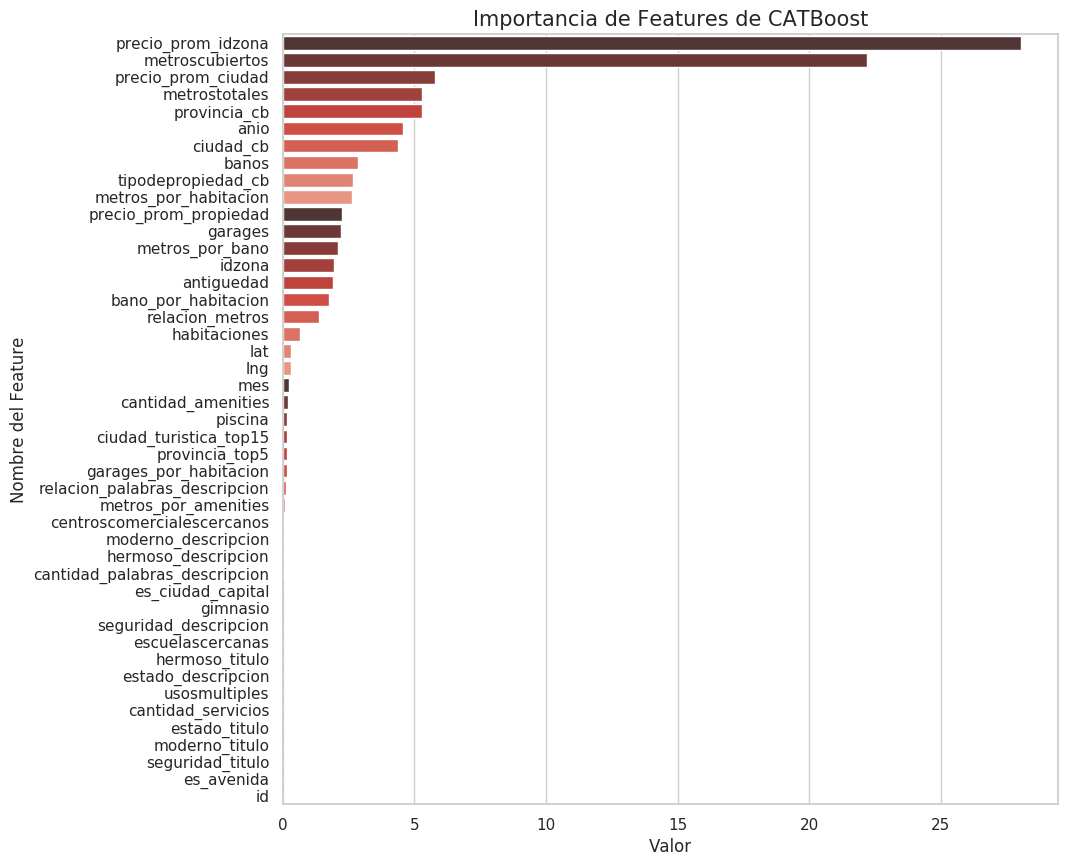

In [83]:
features = pd.DataFrame(index=feature_cols)
features['imp'] = CatBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de CATBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

In [84]:
k=40

features_to_drop = features.nsmallest((df_train.columns.size - k), 'imp').index.tolist()
if 'id' in features_to_drop: features_to_drop.remove('id')
features_to_drop

['moderno_titulo',
 'seguridad_titulo',
 'es_avenida',
 'estado_titulo',
 'cantidad_servicios']

In [85]:
#Dropeamos los features menos importantes
df_train = df_train.drop(features_to_drop, axis=1)
df_test = df_test.drop(features_to_drop, axis=1)

### Guardo Features generados

In [86]:
df_train.to_csv('../data/train_con_features_encoded.csv')
df_test.to_csv('../data/test_con_features_encoded.csv')